In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import matplotlib.pyplot as plt

from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np

In [11]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

In [12]:
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 100,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

In [13]:
training_images = torch.randn(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()

In [14]:
# after a lot of training
sampled_images = diffusion.sample(batch_size = 4)

sampling loop time step: 100%|███████████████████████████████████████████████████████| 100/100 [07:23<00:00,  4.44s/it]


In [19]:
sampled_images.shape # (4, 3, 128, 128)

torch.Size([4, 3, 128, 128])

In [20]:
sampled_images[0].shape

torch.Size([3, 128, 128])

In [32]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        print(img.shape)
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [39]:
grid = make_grid([sampled_images[0], sampled_images[1], sampled_images[2], sampled_images[3]])

torch.Size([3, 132, 522])


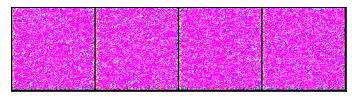

In [40]:
show(grid)